<a href="https://colab.research.google.com/github/afraniofilho/Python-Training-Ford/blob/main/Aula_10_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.0MB/s 
     |████████████████████████████████| 276kB 18.1MB/s 
     |████████████████████████████████| 1.4MB 18.4MB/s 
     |████████████████████████████████| 174kB 31.7MB/s 
     |████████████████████████████████| 2.0MB 31.1MB/s 
     |████████████████████████████████| 1.7MB 35.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 35.3MB/s 
     |████████████████████████████████| 256kB 33.7MB/s 
     |████████████████████████████████| 14.2MB 248kB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 112kB 46.3MB/s 
     |████████████████████████████████| 112kB 32.8MB/s 
     |████████████████████████████████| 3.1MB 27.8MB/s 
     |████████████████████████████████| 10.1MB 23.6M

In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
df = pd.read_csv('car.data', names=('preço', 'manutenção', 'no portas', 'no assentos', 'vol porta-malas', 'segurança', 'Aceitação'))

In [4]:
df.head()

,preço,manutenção,no portas,no assentos,vol porta-malas,segurança,Aceitação
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

In [6]:
classificação = setup(data=df, target='Aceitação', session_id=111)

,Description,Value
0,session_id,111
1,Target,Aceitação
2,Target Type,Multiclass
3,Label Encoded,"acc: 0, good: 1, unacc: 2, vgood: 3"
4,Original Data,"(1728, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
car_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9669,0.9984,0.9167,0.9682,0.9666,0.9278,0.9281
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9587,0.9963,0.9262,0.9587,0.9587,0.9105,0.9105
3,0.9752,0.9975,0.9851,0.9757,0.9753,0.9467,0.9469
4,0.9752,0.9989,0.9851,0.9799,0.9765,0.9475,0.9483
5,0.9835,0.9997,0.9940,0.9846,0.9837,0.9648,0.9655
6,0.9587,0.9941,0.9613,0.9686,0.9608,0.9124,0.9139
7,0.9917,1.0000,0.9500,0.9920,0.9913,0.9820,0.9822
8,0.9917,0.9998,0.9500,0.9920,0.9913,0.9825,0.9826
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


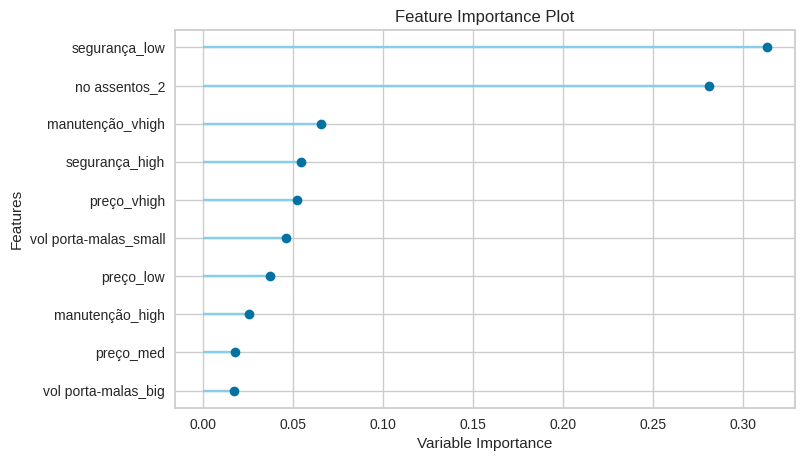

In [8]:
plot_model(car_model, plot='feature')

In [9]:
car_prediction = df.iloc[[1]]

In [10]:
car_prediction

,preço,manutenção,no portas,no assentos,vol porta-malas,segurança,Aceitação
1,vhigh,vhigh,2,2,small,med,unacc


In [11]:
predict_model(car_model, data=car_prediction)

,preço,manutenção,no portas,no assentos,vol porta-malas,segurança,Aceitação,Label,Score
1,vhigh,vhigh,2,2,small,med,unacc,unacc,1.0
